# Practical Example - Extracting IVs from a strip of Caplets

## Imports

In [1]:
from caplets_functions import implied_volatility_caplet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from mpl_bsic import apply_bsic_logo, apply_bsic_style

## Computing IVs

In [9]:
data = pd.read_excel("../data.xlsx", 'euribor_caplets')
data['exp_date'] = pd.to_datetime(data['exp_date'])
data.head()

,price,exp_date,pmt_date,days_to_payment,days_to_expiry,notional,strike,forward_zero_rate,discount_factor
0,33400.13,2024-08-16,02/20/2025,184,181,10000000,0.026056,0.032240,0.966468
1,20759.89,2025-02-18,08/20/2025,181,367,10000000,0.026056,0.026780,0.954629
2,21381.41,2025-08-18,02/20/2026,184,548,10000000,0.026056,0.024549,0.943821
3,24385.08,2026-02-18,08/20/2026,181,732,10000000,0.026056,0.024086,0.933516
4,28189.17,2026-08-18,02/22/2027,186,913,10000000,0.026056,0.024090,0.923048


In [12]:
# store computed IVs
ivs = np.zeros(data.shape[0], dtype=float)

for caplet in data.itertuples(): 
    price = caplet.price
    notional = caplet.notional

    # divide by 365 to get years
    time_to_expiry = caplet.days_to_expiry / 365  # type: ignore  
    delta_i = caplet.days_to_payment / 365 # type: ignore
    
    f_i = caplet.forward_zero_rate
    discount_factor = caplet.discount_factor
    r_k = caplet.strike

    sigma = implied_volatility_caplet(price,r_k,f_i,notional,delta_i,time_to_expiry,discount_factor)
    ivs[caplet.Index] = sigma[0]

ivs

array([0.33338867, 0.38208527, 0.42638672, 0.44542679, 0.44754318,
       0.43026611, 0.43177307, 0.41676102, 0.41815247, 0.39486664,
       0.39579239, 0.38443466, 0.38557617, 0.36358658, 0.36441505,
       0.35170807, 0.35264374, 0.34127884, 0.34197906])

## Plotting Results

fonts already added so will not add again


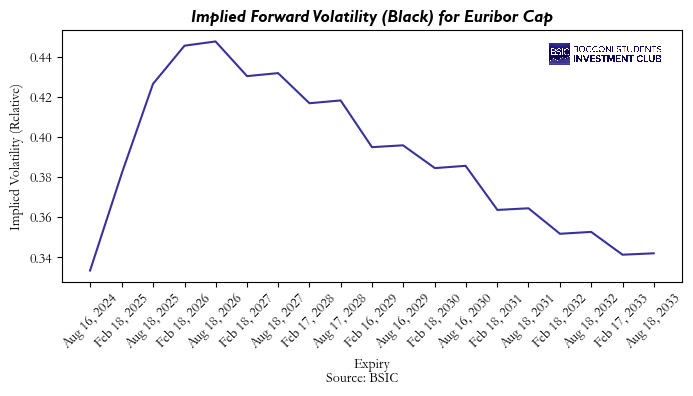

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

apply_bsic_style(fig, ax)
apply_bsic_logo(fig, ax, location="top right")
ax.plot(data["exp_date"], ivs)

ax.set_title("Implied Forward Volatility (Black) for Euribor Cap")
ax.set_ylabel("Implied Volatility (Relative)")
ax.set_xlabel("Expiry")

myFmt = mdates.DateFormatter("%b %d, %Y")
ax.set_xticks(data["exp_date"])
ax.tick_params(axis="x", rotation=45)

ax.xaxis.set_major_formatter(myFmt)

fig.subplots_adjust(bottom=0.25)